In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

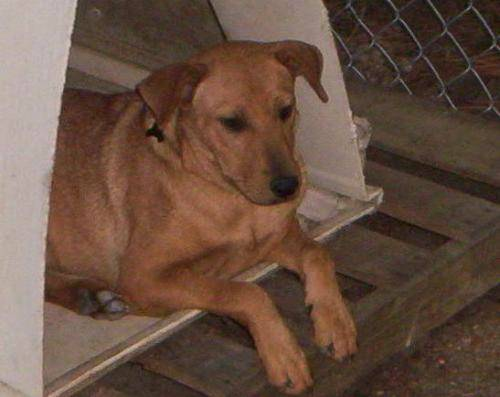

In [3]:
path = './train/dogs'
name = 'dog.100.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

# Question 1

In [32]:
inputs = keras.Input(shape=(150, 150, 3))

conv = keras.layers.Conv2D(filters=32, kernel_size=(3,3), 
                           activation="relu")(inputs)

max_pool_2d = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv)

vectors = keras.layers.Flatten()(max_pool_2d)

dense = keras.layers.Dense(64, activation='relu')(vectors)

outputs = keras.layers.Dense(1, activation='sigmoid')(dense)

CNNmodel = keras.Model(inputs, outputs)

optimizer = keras.optimizers.SGD(lr=0.002, momentum=0.8)

c:\users\arvin\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [5]:
loss = keras.losses.BinaryCrossentropy()

# Question 2

In [6]:
CNNmodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                             

In [7]:
image_gen = ImageDataGenerator(rescale=1./255)

train_ds = image_gen.flow_from_directory(
    './train',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20
)

val_ds = image_gen.flow_from_directory(
    './val',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [9]:
val_ds.class_indices

{'cats': 0, 'dogs': 1}

In [10]:
CNNmodel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [11]:
# Train the CNN
history = CNNmodel.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 28s 272ms/step - loss: 0.7014 - accuracy: 0.4955 - val_loss: 0.6910 - val_accuracy: 0.5390
Epoch 2/10
100/100 [==============================] - 29s 290ms/step - loss: 0.6913 - accuracy: 0.5405 - val_loss: 0.6872 - val_accuracy: 0.5790
Epoch 3/10
100/100 [==============================] - 29s 293ms/step - loss: 0.6808 - accuracy: 0.5570 - val_loss: 0.6963 - val_accuracy: 0.5110
Epoch 4/10
100/100 [==============================] - 28s 282ms/step - loss: 0.6710 - accuracy: 0.5855 - val_loss: 0.6668 - val_accuracy: 0.5830
Epoch 5/10
100/100 [==============================] - 25s 247ms/step - loss: 0.6688 - accuracy: 0.5810 - val_loss: 0.6692 - val_accuracy: 0.5880
Epoch 6/10
100/100 [==============================] - 29s 293ms/step - loss: 0.6603 - accuracy: 0.6050 - val_loss: 0.6604 - val_accuracy: 0.5900
Epoch 7/10
100/100 [==============================] - 28s 280ms/step - loss: 0.6529 - accuracy: 0.6055 - val_loss: 0.6418 - val_ac

# Question 3 

In [31]:
training_accuracy = pd.DataFrame(history.history["accuracy"])
training_accuracy.sort_values

<bound method DataFrame.sort_values of         0
0  0.4955
1  0.5405
2  0.5570
3  0.5855
4  0.5810
5  0.6050
6  0.6055
7  0.6125
8  0.6170
9  0.6245>

In [13]:
training_accuracy.median()

0    0.59525
dtype: float64

# Question 4

In [14]:
training_loss = pd.DataFrame(history.history["loss"])
training_loss.std()

0    0.019795
dtype: float64

In [16]:
train_gen_aug = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest'
)

train_ds_aug = train_gen_aug.flow_from_directory(
    './train',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20
)

Found 20000 images belonging to 2 classes.


# Question 5

In [18]:
history2 = CNNmodel.fit(
    train_ds_aug,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 33s 335ms/step - loss: 0.6609 - accuracy: 0.5825 - val_loss: 0.7349 - val_accuracy: 0.5290
Epoch 2/10
100/100 [==============================] - 32s 325ms/step - loss: 0.6614 - accuracy: 0.5785 - val_loss: 0.6534 - val_accuracy: 0.5910
Epoch 3/10
100/100 [==============================] - 31s 314ms/step - loss: 0.6660 - accuracy: 0.5830 - val_loss: 0.6229 - val_accuracy: 0.6530
Epoch 4/10
100/100 [==============================] - 34s 337ms/step - loss: 0.6570 - accuracy: 0.6005 - val_loss: 0.6160 - val_accuracy: 0.6320
Epoch 5/10
100/100 [==============================] - 33s 331ms/step - loss: 0.6549 - accuracy: 0.6045 - val_loss: 0.6566 - val_accuracy: 0.5890
Epoch 6/10
100/100 [==============================] - 36s 363ms/step - loss: 0.6555 - accuracy: 0.5955 - val_loss: 0.6182 - val_accuracy: 0.6720
Epoch 7/10
100/100 [==============================] - 35s 350ms/step - loss: 0.6386 - accuracy: 0.6290 - val_loss: 0.6249 - val_ac

In [19]:
validation_loss_aug = pd.DataFrame(history2.history["val_loss"])
validation_loss_aug.mean()

0    0.640316
dtype: float64

# Question 6

In [20]:
validation_acc_aug = pd.DataFrame(history2.history["val_accuracy"])
validation_acc_aug

,0
0,0.529
1,0.591
2,0.653
3,0.632
4,0.589
5,0.672
6,0.646
7,0.673
8,0.617
9,0.658


In [21]:
validation_acc_aug[5:10].mean()


0    0.6532
dtype: float64